In [1]:
import sys
sys.path.append('/Users/dmitrys/anaconda2/lib/python2.7/site-packages')
import numpy as np
from scipy import special
from sklearn.base import ClassifierMixin, BaseEstimator
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_features=100, n_samples=1000)
y = 2 * (y - 0.5)
X = np.float128(X)
y = np.float128(y)

In [4]:
from sklearn.metrics import log_loss

In [5]:
log_loss(y, np.dot(X, w))

NameError: name 'w' is not defined

In [6]:
w = np.random.uniform(size=100).reshape((100,))

In [7]:
#w = np.ones((100,))

In [8]:
l1 = 0.9
l2 = 0.9

In [9]:
np.log(1 + np.exp((-y, np.dot(X, w))))

array([[ 1.3132617,  1.3132617,  1.3132617, ...,  1.3132617,  0.31326169,
         0.31326169],
       [ 3.691271e-05,  2.6773512,  10.525122, ...,  7.3541949,
         0.048409772,  7.1639169]], dtype=float128)

In [394]:
np.sum(np.log(1 + np.exp((-y, np.dot(X, w)))))

3215.2658182044024691

In [395]:
np.sum(np.log(1 + np.exp((-y*np.dot(X, w))))) +  l1*np.sum(np.abs(w)) + l2*np.sum(np.power(w, 2))

2352.9343107305325997

In [396]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [397]:
def lossf(w, X, y, l1, l2):
    """
    Вычисление функции потерь.

    :param w: numpy.array размера  (M,) dtype = np.float
    :param X: numpy.array размера  (N, M), dtype = np.float
    :param y: numpy.array размера  (N,), dtype = np.int
    :param l1: float, l1 коэффициент регуляризатора 
    :param l2: float, l2 коэффициент регуляризатора 
    :return: float, value of loss function
    """
    lossf = np.sum(np.log(1 + np.exp((-y*np.dot(X, w))))) + l1*np.sum(np.abs(w)) + l2*np.sum(np.power(w, 2))
    return lossf

In [357]:
(np.exp((-y*np.dot(X, w))) * (-y*X.T)).T.shape

(1000, 100)

In [358]:
lossf(w, X, y, 0.5, 0.5)

2080.9107299904285

In [398]:
def gradf(w, X, y, l1, l2):
    """
    Вычисление градиента функции потерь.

    :param w: numpy.array размера  (M,), dtype = np.float
    :param X: numpy.array размера  (N, M), dtype = np.float
    :param y: numpy.array размера  (N,), dtype = np.int
    :param l1: float, l1 коэффициент регуляризатора 
    :param l2: float, l2 коэффициент регуляризатора 
    :return: numpy.array размера  (M,), dtype = np.float, gradient vector d lossf / dw
    """
    gradw = np.dot((1/(1+np.exp((-y*np.dot(X, w))))),(np.exp((-y*np.dot(X, w)))*(-y*X.T)).T)+l1*np.sign(w)+l2*2*w
    return gradw

In [360]:
np.exp(-1)

0.36787944117144233

In [361]:
logit.w.shape

(100,)

In [442]:
class LR(ClassifierMixin, BaseEstimator):
    def __init__(self, lr=1, l1=1e-4, l2=1e-4, num_iter=1000, verbose=0):
        self.l1 = l1
        self.l2 = l2
        self.w = None
        self.lr = lr
        self.verbose = verbose
        self.num_iter = num_iter

    def fit(self, X, y):
        """
        Обучение логистической регрессии.
        Настраивает self.w коэффициенты модели.

        Если self.verbose == True, то выводите значение 
        функции потерь на итерациях метода оптимизации. 

        :param X: numpy.array размера  (N, M), dtype = np.float
        :param y: numpy.array размера  (N,), dtype = np.int
        :return: self
        """
        n, d = X.shape
        self.w = np.random.uniform(size=100).reshape((100,))
    
        for i in range(self.num_iter):
            grad = gradf(self.w, X, y, self.l1, self.l2)
            
            while lossf(self.w-grad*self.lr, X, y, self.l1, self.l2) >\
                  lossf(self.w, X, y, self.l1, self.l2) - 0.1*self.lr*np.linalg.norm(grad, ord=2)**2:
                    
                self.lr = 0.95*self.lr
            self.w -= grad * self.lr 
            
            
            #loss = lossf(self.w, X, y, self.l1, self.l2)
            #grad = np.random.uniform(low=-1e-4, high=1e-4, size=self.w.shape)
            #self.lr = self.lr/np.linalg.norm(grad)
            #self.w -= self.lr * grad
            if self.verbose:
                print lossf(self.w, X, y, self.l1, self.l2)
        
        return self

    def predict_proba(self, X):
        """
        Предсказание вероятности принадлежности объекта к классу 1.
        Возвращает np.array размера (N,) чисел в отрезке от 0 до 1.

        :param X: numpy.array размера  (N, M), dtype = np.float
        :return: numpy.array размера  (N,), dtype = np.int
        """
        # Вычислите вероятности принадлежности каждого 
        # объекта из X к положительному классу, используйте
        # эту функцию для реализации LR.predict
        odds = np.exp(np.dot(X, self.w))
        probs = odds/(1+odds)
        return probs

    def predict(self, X):
        """
        Предсказание класса для объекта.
        Возвращает np.array размера (N,) элементов 1 или -1.

        :param X: numpy.array размера  (N, M), dtype = np.float
        :return:  numpy.array размера  (N,), dtype = np.int
        """
        # Вычислите предсказания для каждого объекта из X
        predicts = np.array([1 if i else -1 for i in self.predict_proba(X)>0.5])
        return predicts 

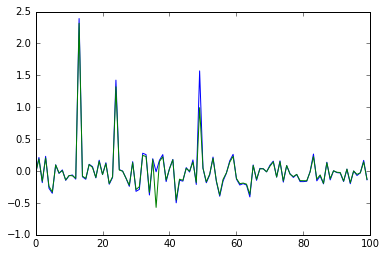

In [444]:
from sklearn.linear_model import LogisticRegression
sk_logit = LogisticRegression()
sk_logit.fit(X, y)
plt.plot(logit.w)
plt.plot(sk_logit.coef_[0])

In [443]:
logit = LR(verbose=1, lr=1)
logit.fit(X, y)

1442.44194109
413.791216028
328.893746387
279.008676135
249.533112214
232.869120463
223.920499991
219.879425328
217.108446089
214.067090187
210.659369904
208.529984225
206.771901453
205.056889467
203.593031028
202.172898332
200.998275518
200.124124684
199.364969468
198.761869961
198.223485729
197.786800976
197.392632799
196.956155142
196.566718759
196.244652638
195.953478273
195.707839066
195.484250807
195.294927207
195.122221386
194.977628103
194.7948801
194.642840249
194.506618026
194.390649085
194.286172191
194.196062607
194.114652661
194.043983736
193.980060959
193.924461488
193.874153714
193.830458916
193.7909259
193.756745895
193.725827872
193.688429488
193.655900024
193.62837247
193.604278514
193.583594699
193.565410782
193.549648691
193.535750794
193.523625747
193.512914644
193.50352962
193.495229586
193.487936401
193.48148227
193.475800436
193.470770768
193.466337527
193.462412778
193.458950717
193.455885897
193.453181056
193.450786878
193.44867328
193.446802759
193.44515117
1

LR(l1=0.0001, l2=0.0001, lr=0.00534327762135, num_iter=1000, verbose=1)

In [445]:
def test_work():
    print "Start test"
    X, y = make_classification(n_features=100, n_samples=1000)
    y = 2 * (y - 0.5)

    try:
        clf = LR(lr=1, l1=1e-4, l2=1e-4, num_iter=1000, verbose=0)
    except Exception:
        assert False, "Создание модели завершается с ошибкой"
        return

    try:
        clf.fit(X, y)
    except Exception:
        assert False, "Обучение модели завершается с ошибкой"
        return

    assert isinstance(lossf(clf.w, X, y, 1e-3, 1e-3), float), "Функция потерь должна быть скалярной и иметь тип np.float"
    assert gradf(clf.w, X, y, 1e-3, 1e-3).shape == (100,), "Размерность градиента должна совпадать с числом параметров"
    assert gradf(clf.w, X, y, 1e-3, 1e-3).dtype == np.float, "Вектор градиента, должен состоять из элементов типа np.float"
    assert clf.predict(X).shape == (1000,), "Размер вектора предсказаний, должен совпадать с количеством объектов"
    assert np.min(clf.predict_proba(X)) >= 0, "Вероятности должны быть не меньше, чем 0"
    assert np.max(clf.predict_proba(X)) <= 1, "Вероятности должны быть не больше, чем 1"
    assert len(set(clf.predict(X))) == 2, "Метод предсказывает больше чем 2 класса на двух классовой задаче"
    print "End tests"

In [446]:
test_work()

Start test


/Users/dmitrys/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in exp


End tests
